In [1]:
from google.colab import drive as drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Access a public Github repos
# !rm -rf /content/Brain-Tumor-MRI-Dataset # remove git clone
%cd '/content'
!git clone https://github.com/ricardotran92/Chest-CT-Scan-images-Dataset.git

/content
Cloning into 'Chest-CT-Scan-images-Dataset'...
remote: Enumerating objects: 879, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 879 (delta 0), reused 0 (delta 0), pack-reused 876
Receiving objects: 100% (879/879), 82.50 MiB | 26.40 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Updating files: 100% (1233/1233), done.


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image


In [4]:
# @title
def DataSetSummary (local_path, tabs):
  # Take list of files & folders in local folder
  all_items = os.listdir(local_path)

  # Filter folder list
  folders = [item for item in all_items if os.path.isdir(os.path.join(local_path, item))]

  # Print summary information if folders > 0:
  if(len(folders) > 0):
    indent = '\t' * tabs
    print("{}Tổng số thư mục: {}".format(indent, len(folders)))
    for folder in folders:
      folder_path = os.path.join(local_path, folder)
      files_in_folder = len(os.listdir(folder_path))
      print("{}-Thư mục: {}, Số tệp: {}".format(indent, folder, files_in_folder))
      DataSetSummary(folder_path, tabs+1)

# DataSetSummary(local_path, 0)

In [5]:
# import os

# Hierarchical local folder in Colab
repository_folder = ["Chest-CT-Scan-images-Dataset"]

for folder in repository_folder:
    local_path = '/content/' + folder + '/dataset'
    DataSetSummary(local_path, 0)
    local_path = '/content/' + folder + '/sample'
    DataSetSummary(local_path, 0)

Tổng số thư mục: 3
-Thư mục: test, Số tệp: 4
	Tổng số thư mục: 4
	-Thư mục: normal, Số tệp: 54
	-Thư mục: adenocarcinoma, Số tệp: 120
	-Thư mục: squamous.cell.carcinoma, Số tệp: 90
	-Thư mục: large.cell.carcinoma, Số tệp: 51
-Thư mục: train, Số tệp: 4
	Tổng số thư mục: 4
	-Thư mục: normal, Số tệp: 148
	-Thư mục: large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa, Số tệp: 115
	-Thư mục: adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib, Số tệp: 195
	-Thư mục: squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa, Số tệp: 155
-Thư mục: valid, Số tệp: 4
	Tổng số thư mục: 4
	-Thư mục: normal, Số tệp: 13
	-Thư mục: large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa, Số tệp: 21
	-Thư mục: adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib, Số tệp: 23
	-Thư mục: squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa, Số tệp: 15
Tổng số thư mục: 3
-Thư mục: test, Số tệp: 4
	Tổng số thư mục: 4
	-Thư mục: normal, Số tệp: 20
	-Thư mục: adenocarcinoma, Số tệp: 20
	-Thư mục: squamous.cell.carcinoma, Số tệp: 20
	-Thư mục: large.cell.c

In [6]:
%cd /content/drive/MyDrive/Colab Notebooks/Thesis/03_CannyEdge_bilateralFilter_preprocess

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Thesis/03_CannyEdge_bilateralFilter_preprocess'
/content


In [7]:
# Set the path to your dataset
# dataset_path = '/content/Brain-Tumor-MRI-Dataset/sample'
dataset_path = '/content/Chest-CT-Scan-images-Dataset/dataset'

Folder: /content/Chest-CT-Scan-images-Dataset/dataset/test/normal


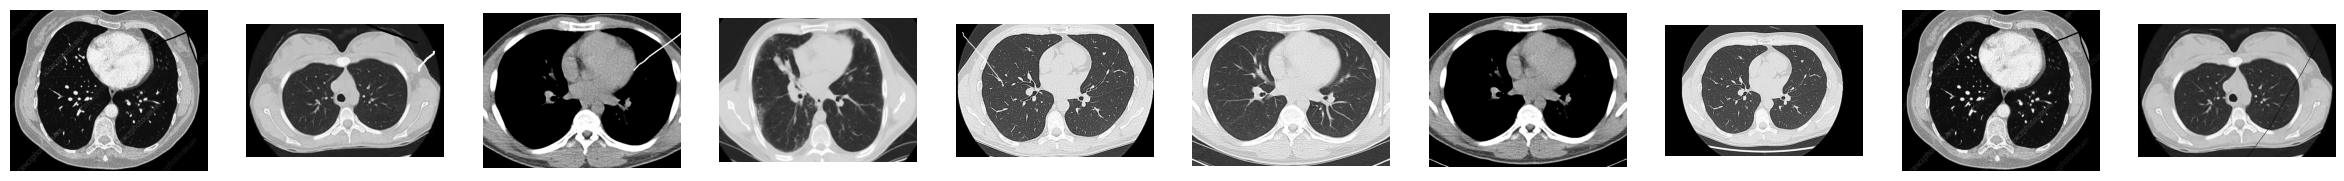

Folder: /content/Chest-CT-Scan-images-Dataset/dataset/test/adenocarcinoma


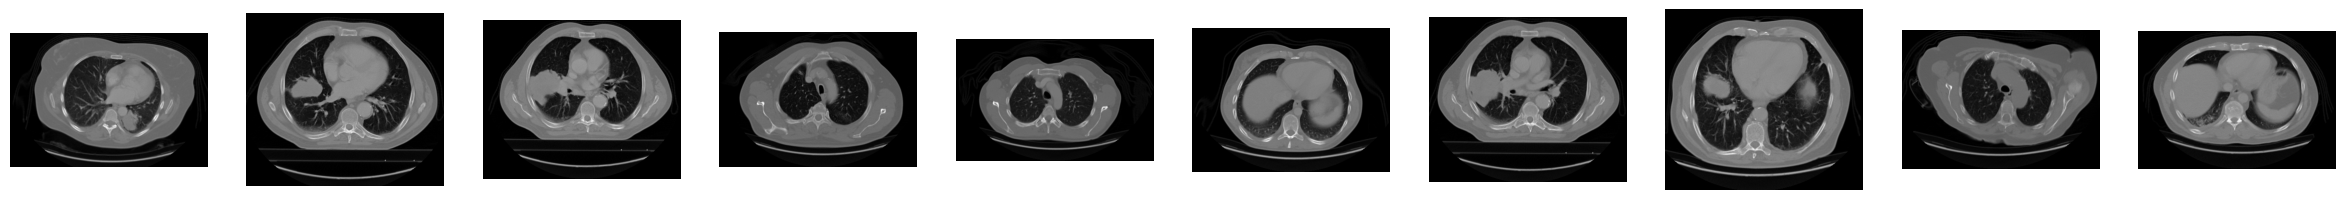

Folder: /content/Chest-CT-Scan-images-Dataset/dataset/test/squamous.cell.carcinoma


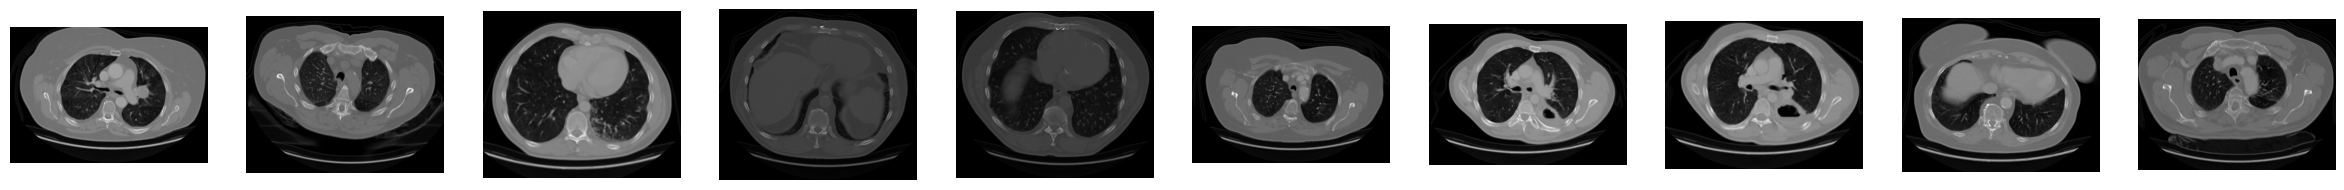

Folder: /content/Chest-CT-Scan-images-Dataset/dataset/test/large.cell.carcinoma


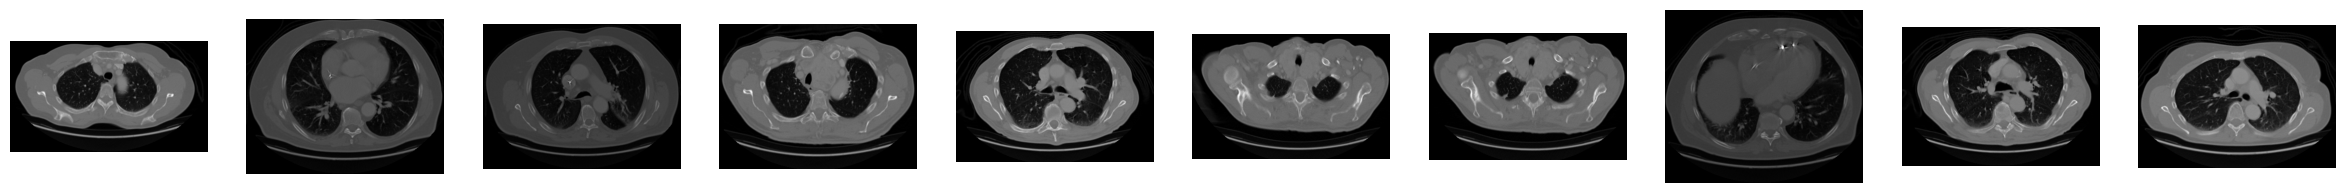

Folder: /content/Chest-CT-Scan-images-Dataset/dataset/train/normal


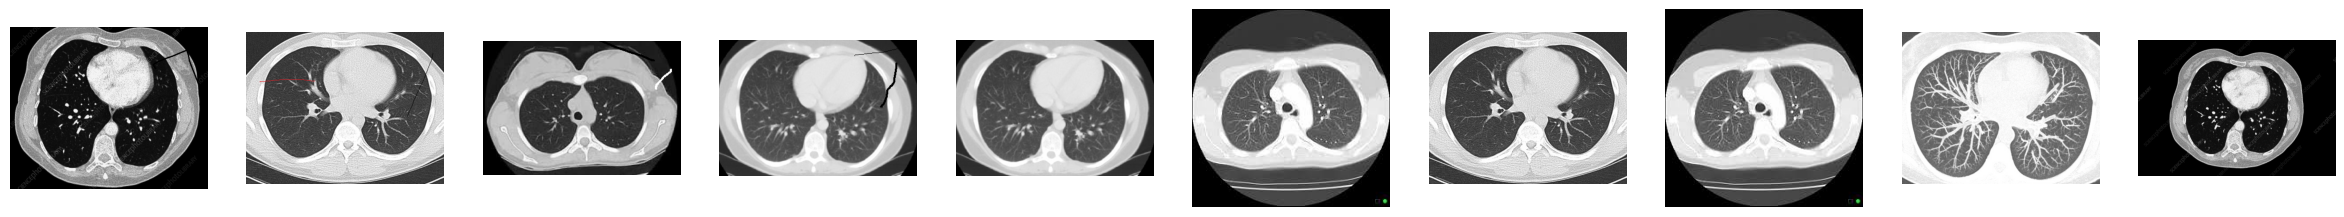

Folder: /content/Chest-CT-Scan-images-Dataset/dataset/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa


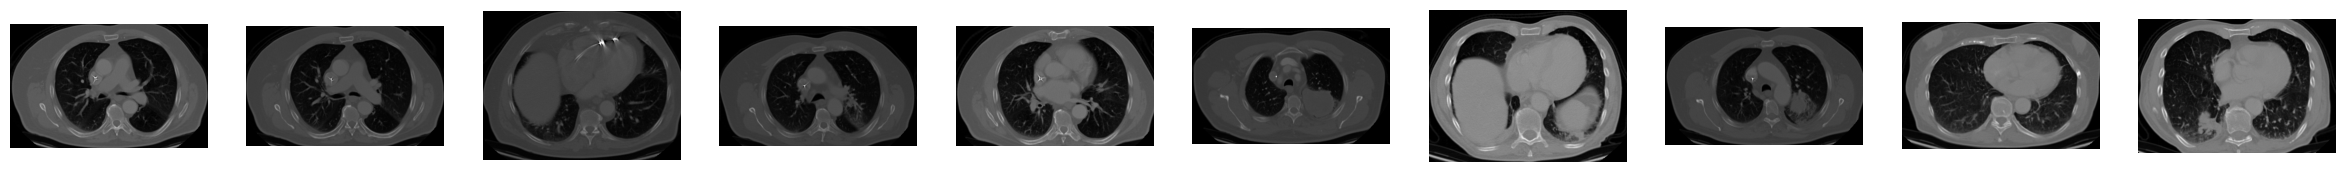

Folder: /content/Chest-CT-Scan-images-Dataset/dataset/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib


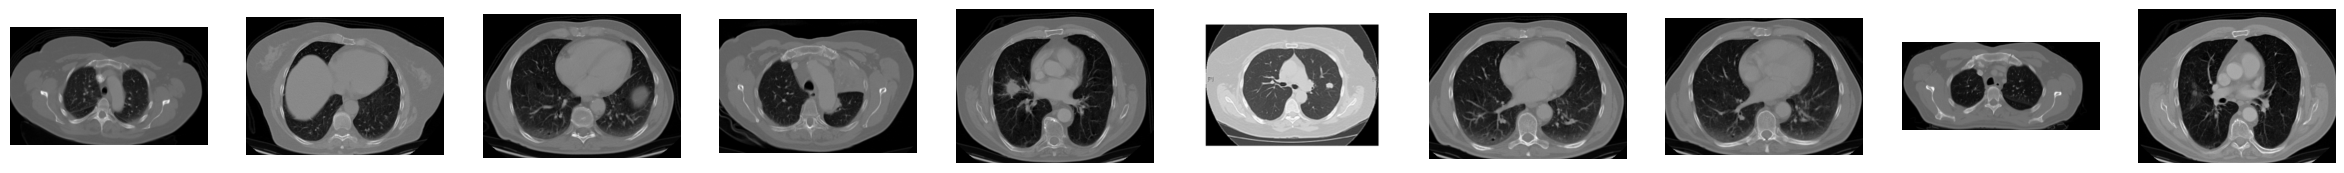

Folder: /content/Chest-CT-Scan-images-Dataset/dataset/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa


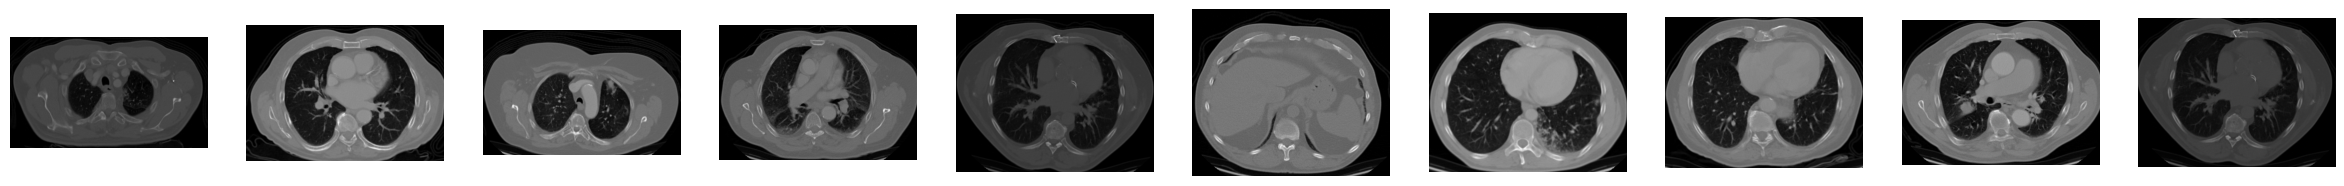

Folder: /content/Chest-CT-Scan-images-Dataset/dataset/valid/normal


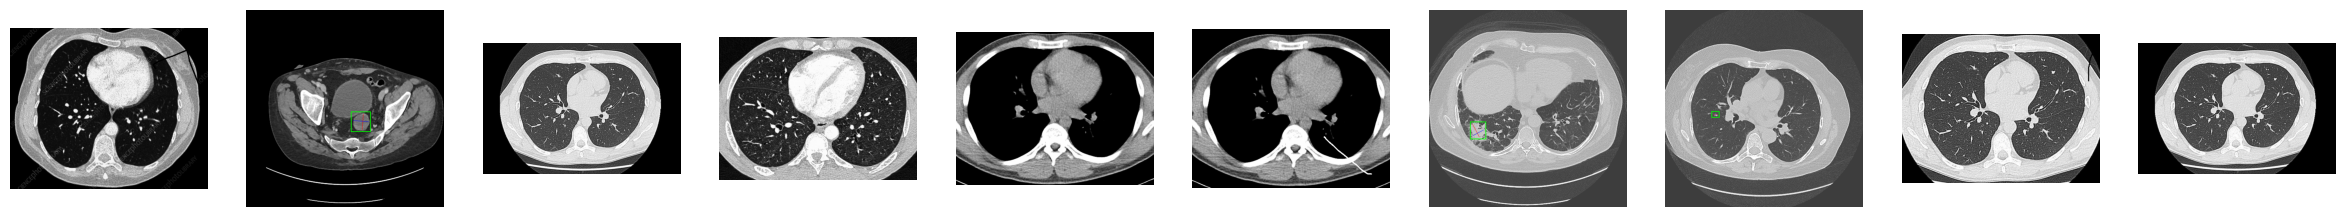

Folder: /content/Chest-CT-Scan-images-Dataset/dataset/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa


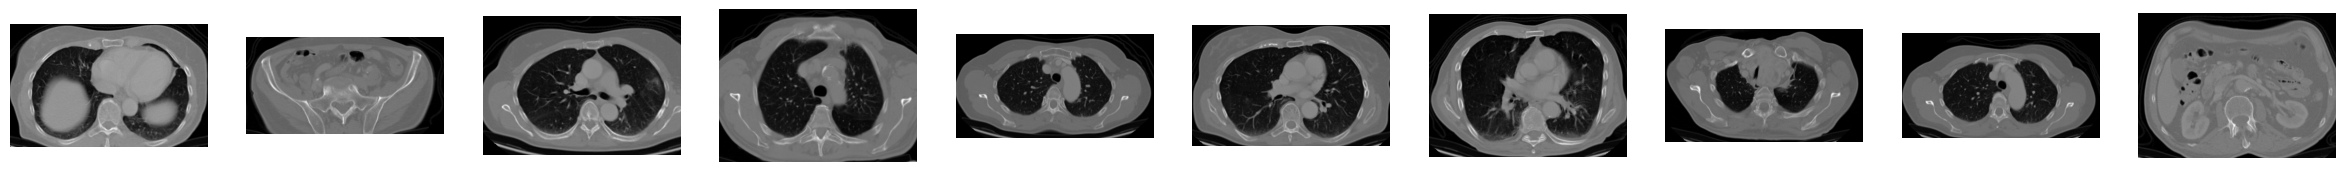

Folder: /content/Chest-CT-Scan-images-Dataset/dataset/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib


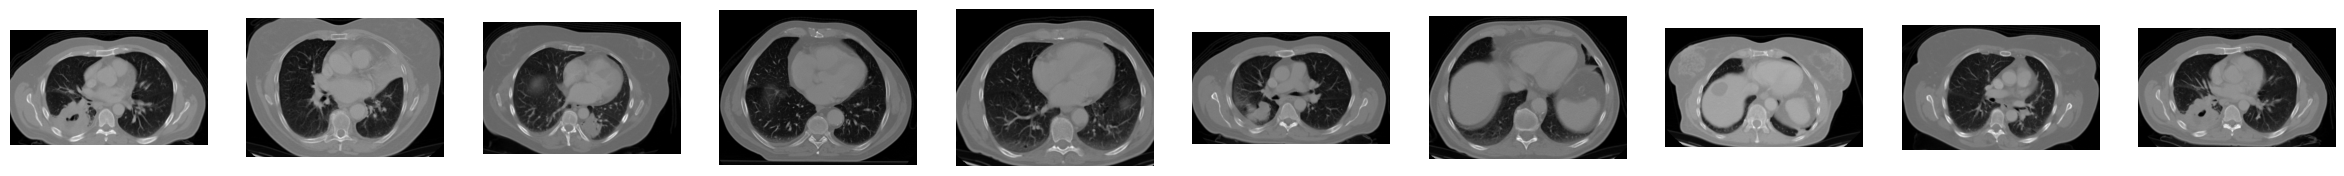

Folder: /content/Chest-CT-Scan-images-Dataset/dataset/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa


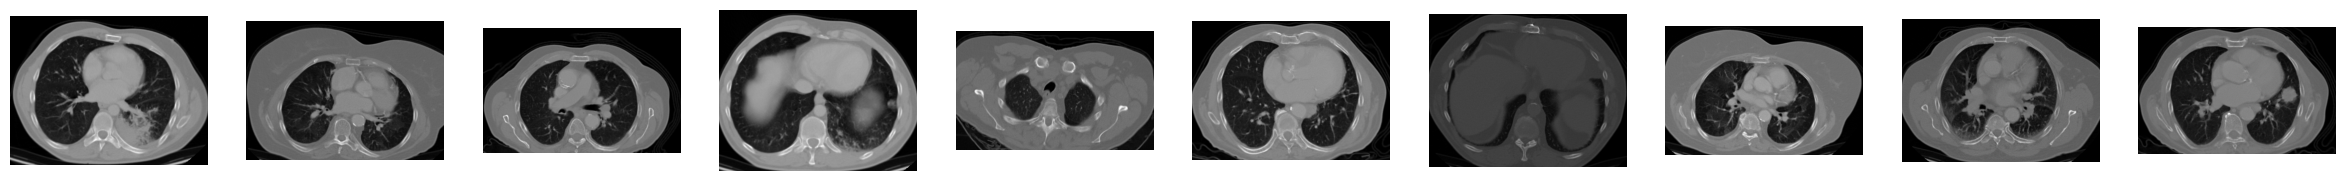

In [8]:
import os
import cv2
import matplotlib.pyplot as plt

def load_images_from_folder(folder_path, images_per_class=10):
    images = {}
    for root, dirs, files in os.walk(folder_path):
        if files:
            images[root] = []
            for file in files:
                if len(images[root]) < images_per_class and file.endswith(('.png', '.jpg', '.jpeg')):
                    images[root].append(os.path.join(root, file))
    return images

def imshow(images):
    for folder, image_paths in images.items():
        plt.figure(figsize=(30,30))
        print(f'Folder: {folder}')
        for i, image_path in enumerate(image_paths):
            plt.subplot(1, len(image_paths), i+1)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            plt.axis('off')
        plt.show()

# Example usage:
# dataset_path = "/path/to/your/dataset"  # replace with the path to your dataset
images = load_images_from_folder(dataset_path)
imshow(images)

In [9]:
images['/content/Chest-CT-Scan-images-Dataset/dataset/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'][0]

'/content/Chest-CT-Scan-images-Dataset/dataset/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000102 (2).png'

In [10]:
from PIL import Image

def get_image_specifications(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Get image specifications
        image_format = img.format
        image_mode = img.mode
        image_size = img.size
        image_width, image_height = img.size
        image_color = img.getcolors()

    return f"Image Format: {image_format}\nImage Mode: {image_mode}\nImage Size: {image_size} pixels (Width: {image_width}, Height: {image_height})\nImage Colors: {image_color}"

# Example usage:
# image_path = "/content/Brain-Tumor-MRI-Dataset/sample/Training/glioma/Tr-gl_0010.jpg"
image_path = images['/content/Chest-CT-Scan-images-Dataset/dataset/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'][0]
image_specifications = get_image_specifications(image_path)
print(image_specifications)

Image Format: PNG
Image Mode: RGBA
Image Size: (426, 255) pixels (Width: 426, Height: 255)
Image Colors: [(1, (255, 255, 255, 255)), (1, (251, 251, 251, 255)), (1, (249, 249, 249, 255)), (2, (247, 247, 247, 255)), (4, (243, 243, 243, 255)), (2, (241, 241, 241, 255)), (3, (237, 237, 237, 255)), (5, (235, 235, 235, 255)), (1, (233, 233, 233, 255)), (5, (231, 231, 231, 255)), (1, (229, 229, 229, 255)), (3, (227, 227, 227, 255)), (1, (225, 225, 225, 255)), (5, (223, 223, 223, 255)), (2, (221, 221, 221, 255)), (1, (219, 219, 219, 255)), (2, (217, 217, 217, 255)), (3, (215, 215, 215, 255)), (5, (213, 213, 213, 255)), (2, (211, 211, 211, 255)), (4, (209, 209, 209, 255)), (2, (207, 207, 207, 255)), (10, (205, 205, 205, 255)), (5, (203, 203, 203, 255)), (8, (201, 201, 201, 255)), (6, (199, 199, 199, 255)), (8, (197, 197, 197, 255)), (8, (195, 195, 195, 255)), (9, (193, 193, 193, 255)), (7, (191, 191, 191, 255)), (9, (189, 189, 189, 255)), (12, (187, 187, 187, 255)), (17, (185, 185, 185, 255)), 

## Load dataset

In [11]:
# Convert strange format supported format with Tensorflow (JPEG, PNG, BMP, GIF)
from PIL import Image
import os

# dataset_path = 'path_to_your_dataset'

for foldername in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, foldername)
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jfif', '.tiff', '.tif')):
            print(f"Reformatting {filename} to JPG format...")
            img = Image.open(os.path.join(folder_path, filename))
            # Remove the extension from the filename
            base_filename = os.path.splitext(filename)[0]
            img.save(os.path.join(folder_path, base_filename + '.jpg'))
            print(f"Reformatted {filename} to JPG format.")

## Load dataset

In [12]:
# Convert strange format supported format with Tensorflow (JPEG, PNG, BMP, GIF)
from PIL import Image
import os

# dataset_path = 'path_to_your_dataset'

for foldername in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, foldername)
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jfif', '.tiff', '.tif')):
            print(f"Reformatting {filename} to JPG format...")
            img = Image.open(os.path.join(folder_path, filename))
            # Remove the extension from the filename
            base_filename = os.path.splitext(filename)[0]
            img.save(os.path.join(folder_path, base_filename + '.jpg'))
            print(f"Reformatted {filename} to JPG format.")

In [13]:
# def preprocess_func(image):
#     # Bộ lọc hai chiều để làm mịn
#     denoised_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

#     # Tạo một ảnh đen có cùng kích thước với denoised_image
#     edges = cv2.Canny(denoised_image, 50, 150)
#     if len(denoised_image.shape) == 2:  # Grayscale image
#         edges_image = np.zeros_like(denoised_image)
#         edges_image = edges
#     else:
#         edges_image = np.zeros_like(denoised_image)
#         edges_image = cv2.merge([edges] * denoised_image.shape[2])  # Convert single-channel edges to a 3-channel image

#     # Thay đổi kích thước của edges_image để khớp với kích thước của denoised_image
#     edges_image = cv2.resize(edges_image, (denoised_image.shape[1], denoised_image.shape[0]))

#     # Kết hợp ảnh gốc với cạnh để làm nổi bật cạnh
#     sharp = cv2.addWeighted(denoised_image, 1.5, edges_image, -0.5, 0)
#     return sharp


In [14]:
# import os
# import cv2
# import numpy as np
# from shutil import copyfile
# from scipy.ndimage.filters import median_filter

# # Hàm tiền xử lý và sao chép
# def preprocess_and_copy(src_dir, dest_dir, preprocess_func):
#     # Kiểm tra xem src_dir có phải là một thư mục không
#     if os.path.isdir(src_dir):
#         # Nếu dest_dir không tồn tại, tạo nó
#         os.makedirs(dest_dir, exist_ok=True)

#         # Lặp qua các tệp/thư mục trong src_dir
#         for item in os.listdir(src_dir):
#             src_item_path = os.path.join(src_dir, item)
#             dest_item_path = os.path.join(dest_dir, item)

#             # Nếu item là một thư mục, gọi hàm đệ quy
#             if os.path.isdir(src_item_path):
#                 preprocess_and_copy(src_item_path, dest_item_path, preprocess_func)
#             # Nếu item là một tệp, áp dụng tiền xử lý và sao chép
#             elif os.path.isfile(src_item_path):
#                 img = cv2.imread(src_item_path)
#                 if img is not None:
#                     img = preprocess_func(img)
#                     cv2.imwrite(dest_item_path, img)
# # Sử dụng
# dataset_path = '/content/Chest-CT-Scan-images-Dataset/dataset'
# output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/03_CannyEdge_bilateralFilter'
# preprocess_and_copy(dataset_path, output_path, preprocess_func)


In [18]:
# Hàm tiền xử lý theo bài viết
def preprocess_func(image):
    # Bước 1: Áp dụng bộ lọc Gaussian để làm mượt ảnh và loại bỏ nhiễu
    smoothed_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Bước 2: Sử dụng thuật toán Canny để phát hiện biên
    edges = cv2.Canny(smoothed_image, 50, 150)

    # Bước 3: Tính độ dốc của ảnh
    gradient_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)

    # Bước 4: Non-Maximum Suppression
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    angle = np.arctan2(gradient_y, gradient_x) * (180 / np.pi)
    angle = np.abs(angle)

    # Bước 5: Double Thresholding
    low_threshold = 50
    high_threshold = 150

    weak_edges = (magnitude > low_threshold) & (magnitude <= high_threshold)
    strong_edges = magnitude > high_threshold

    # Bước 6: Edge Tracking by Hysteresis
    edges_final = np.zeros_like(image)
    edges_final[strong_edges] = 255

    # Sử dụng hysteresis để kết hợp các điểm yếu kết nối với các điểm mạnh
    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            if np.any(weak_edges[i-1:i+2, j-1:j+2] == 255):
                edges_final[i, j] = 255
    return edges_final

In [19]:
import os
import cv2
import numpy as np
from shutil import copyfile
from scipy.ndimage.filters import median_filter

# Hàm tiền xử lý và sao chép
def preprocess_and_copy(src_dir, dest_dir, preprocess_func):
    # Kiểm tra xem src_dir có phải là một thư mục không
    if os.path.isdir(src_dir):
        # Nếu dest_dir không tồn tại, tạo nó
        os.makedirs(dest_dir, exist_ok=True)

        # Lặp qua các tệp/thư mục trong src_dir
        for item in os.listdir(src_dir):
            src_item_path = os.path.join(src_dir, item)
            dest_item_path = os.path.join(dest_dir, item)

            # Nếu item là một thư mục, gọi hàm đệ quy
            if os.path.isdir(src_item_path):
                preprocess_and_copy(src_item_path, dest_item_path, preprocess_func)
            # Nếu item là một tệp, áp dụng tiền xử lý và sao chép
            elif os.path.isfile(src_item_path):
                img = cv2.imread(src_item_path)
                if img is not None:
                    img = preprocess_func(img)
                    cv2.imwrite(dest_item_path, img)

<ipython-input-19-28c4c1f9675a>:5: DeprecationWarning: Please use `median_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import median_filter


In [20]:
# Sử dụng
dataset_path = '/content/Chest-CT-Scan-images-Dataset/dataset'
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/03_CannyEdge_bilateralFilter_v2'
preprocess_and_copy(dataset_path, output_path, preprocess_func)

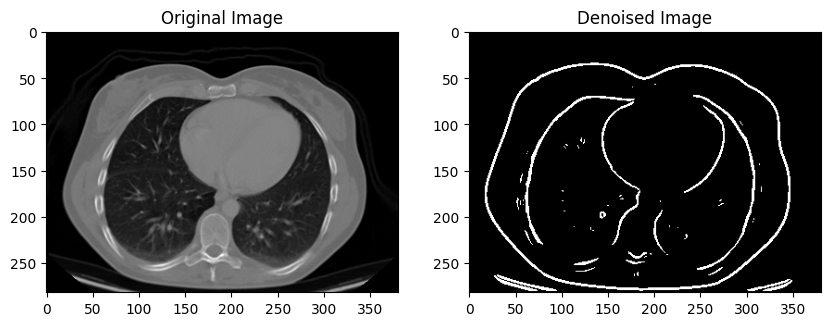

In [21]:
import cv2
import numpy as np
import pywt
# Đọc ảnh cần xử lý
image_path = '/content/Chest-CT-Scan-images-Dataset/dataset/test/adenocarcinoma/000108 (3).png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Áp dụng biến đổi sóng và lọc nhiễu cho ảnh
denoised_image = preprocess_func(img)


# Hiển thị ảnh gốc và ảnh đã xử lý bằng Matplotlib
plt.figure(figsize=(10, 5))

# Ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Ảnh đã xử lý
plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

plt.show()
